In [1]:
## This script adds Lineage annotations and demonstrate read depth, gene number distribution by lineage and cell type. 
## It also calculates and plot percentage of retained cells by cell type and lineage after filtering

# Author: "Isaac Bishara"

In [28]:
setwd('/Users/ibishara/Desktop/FELINE_C1/')

In [29]:
# packages
library(data.table)
library(tidyverse)
library(ggridges)
library(ggpubr)
library(factoextra)

In [30]:
# data
meta_raw <- read.table('raw/FELINE_C1_raw_singler_metadata.txt', sep='\t') # combined raw metadata of FELINE-C1. Generated by IB. Not used in this analysis. 

hpca_anno_raw <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/raw/SingleR/hpca/FELINE_C1_hpca_singleR_annotations.txt', sep='auto'))[, -1] # hpca singleR annotations FELINE-C1
metadata_post_filter <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/post-filter/FEL001046_scRNA.metadata_JF.txt', sep='auto')) # Jinfeng's high quality metadata 
meta_sub <- read.table('metadata_subsample_cell_quality.txt', sep='\t') # subsample metadata


Warning message in fread("/Users/ibishara/Desktop/FELINE_C1/raw/SingleR/hpca/FELINE_C1_hpca_singleR_annotations.txt", :
"Detected 2 column names but the data has 3 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


In [1]:
## This script adds Lineage annotations and demonstrate read depth, gene number distribution by lineage and cell type. 
## It also calculates and plot percentage of retained cells by cell type and lineage after filtering

# Author: "Isaac Bishara"

In [31]:
setwd('/Users/ibishara/Desktop/FELINE_C1/')

In [32]:
# packages
library(data.table)
library(tidyverse)
library(ggridges)
library(ggpubr)
library(qs)
library(factoextra) # ?? 

In [33]:
# # data
seu <- qread(file = "seu.qs", nthreads = 16)
meta_sub <- seu@meta.data


In [34]:
## indexing 
# Lineage
epi.ind <- which(meta_sub$Lineage == "Epithelial_cells")
mes.ind <- which(meta_sub$Lineage == "Mesenchymal_cells")
hem.ind <- which(meta_sub$Lineage == "Hematopoeitic_cells")

# cell type
tcell.ind <- which( meta_sub$hpca == "T_cells" )
bcell.ind <- which( meta_sub$hpca == "B_cell" )
macro.ind <- which( meta_sub$hpca == "Macrophage")
fibro.ind <- which( meta_sub$hpca == "Fibroblasts")

In [35]:
## setting cut-offs
## JF's cut-off for FELINE_C1: > 2000 UMI. 500 - 7000 genes 
Total.Reads_cutoff <- 1500
new.Total.Reads_cutoff <- 800
Expressed.Features_cutoff.min <- 500
Expressed.Features_cutoff.max <- 7000



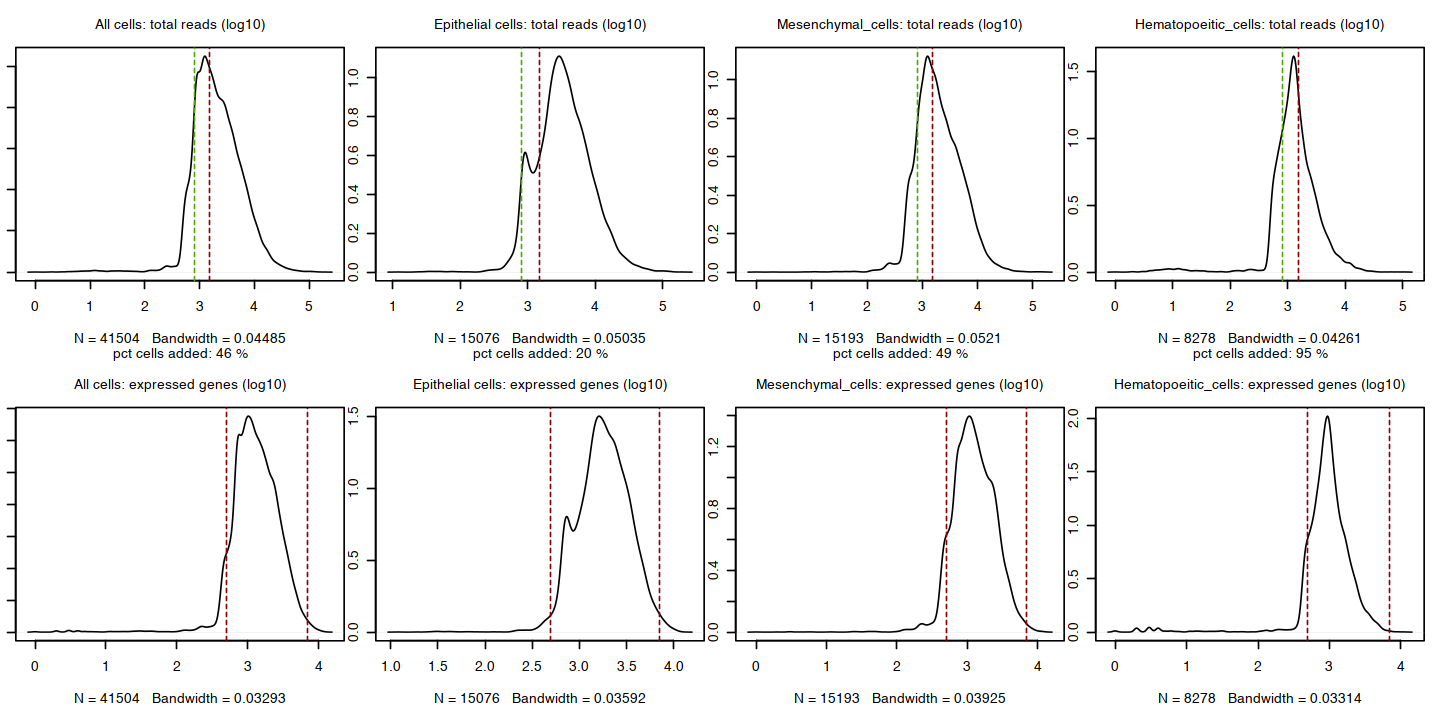

In [36]:

options(repr.plot.width=12, repr.plot.height=6)
pre.retained.all <- length(which(meta_sub$Total.Reads > Total.Reads_cutoff))
post.retained.all <- length(which(meta_sub$Total.Reads < Total.Reads_cutoff & meta_sub$Total.Reads > new.Total.Reads_cutoff))

pre.retained.epi <- length(which(meta_sub$Total.Reads[epi.ind] > Total.Reads_cutoff))
post.retained.epi <- length(which(meta_sub$Total.Reads[epi.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[epi.ind] > new.Total.Reads_cutoff))

pre.retained.mes <- length(which(meta_sub$Total.Reads[mes.ind] > Total.Reads_cutoff))
post.retained.mes <- length(which(meta_sub$Total.Reads[mes.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[mes.ind] > new.Total.Reads_cutoff))

pre.retained.hem <- length(which(meta_sub$Total.Reads[hem.ind] > Total.Reads_cutoff))
post.retained.hem <- length(which(meta_sub$Total.Reads[hem.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[hem.ind] > new.Total.Reads_cutoff))

## Plot number of reads and genes by lineage
par(mfrow=c(2,4), mar=c(5,1,3,1))
plot(main = "All cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.all/pre.retained.all),'%' ), density(log10(meta_sub$Total.Reads)), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "Epithelial cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.epi/pre.retained.epi),'%' ), density(log10(meta_sub$Total.Reads[epi.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "Mesenchymal_cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.mes/pre.retained.mes),'%' ), density(log10(meta_sub$Total.Reads[mes.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "Hematopoeitic_cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.hem/pre.retained.hem),'%' ), density(log10(meta_sub$Total.Reads[hem.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")

plot(main = "All cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features)), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "Epithelial cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features[epi.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "Mesenchymal_cells: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[mes.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "Hematopoeitic_cells: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[hem.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")

# dev.off()

In [38]:
all.disposed <- length(which(meta_sub$Total.Reads < Total.Reads_cutoff)) / length(meta_sub$Total.Reads )
epi.disposed <- length(which(meta_sub$Total.Reads[epi.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[epi.ind] )
mes.disposed <- length(which(meta_sub$Total.Reads[mes.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[mes.ind] )
hem.disposed <- length(which(meta_sub$Total.Reads[hem.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[hem.ind] )

tcell.disposed <- length(which(meta_sub$Total.Reads[tcell.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[tcell.ind] )

macro.disposed <- length(which(meta_sub$Total.Reads[macro.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[macro.ind] )

fibro.disposed <- length(which(meta_sub$Total.Reads[fibro.ind] < Total.Reads_cutoff)) / length(meta_sub$Total.Reads[fibro.ind] )

all.disposed
epi.disposed
mes.disposed
hem.disposed
tcell.disposed
macro.disposed
fibro.disposed 

[1] 0.3936006

[1] 0.1915627

[1] 0.4194695

[1] 0.59338

[1] 0.6876033

[1] 0.3527174

[1] 0.3902604

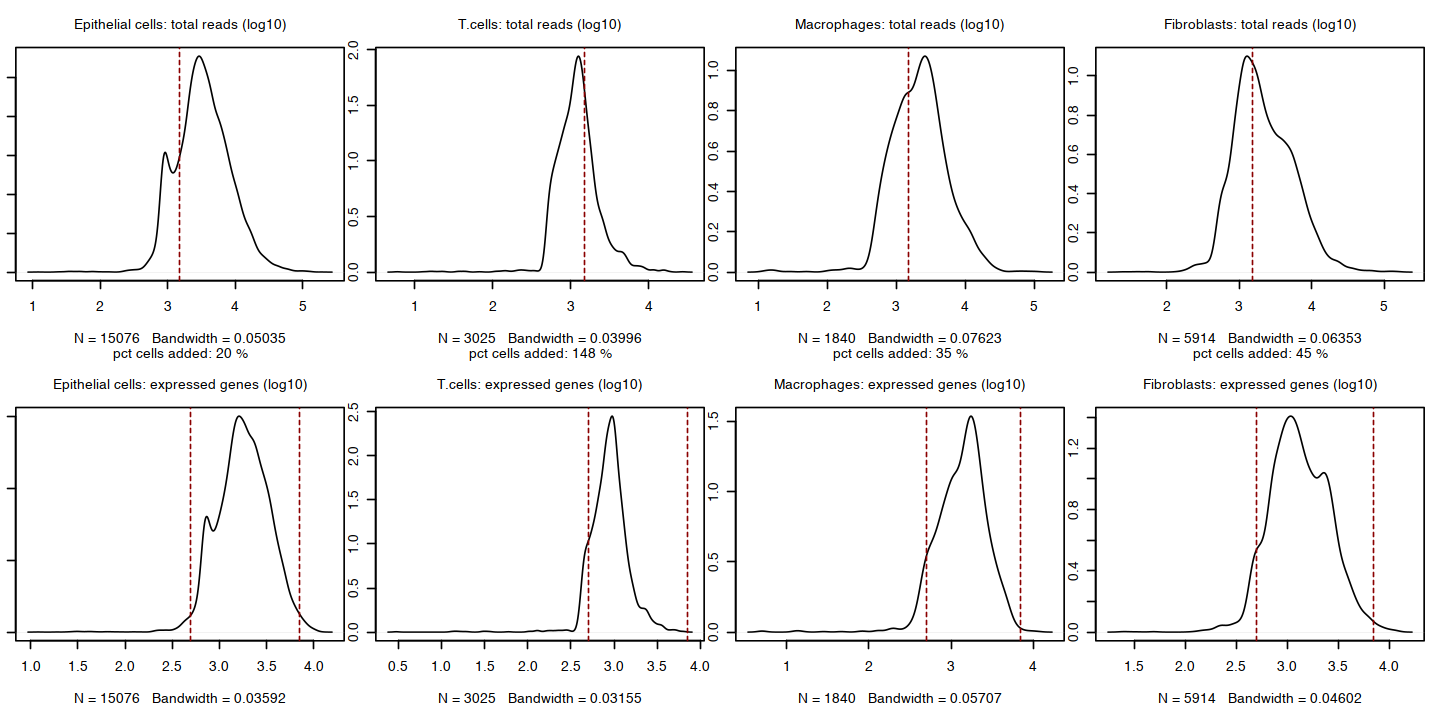

In [18]:

options(repr.plot.width=12, repr.plot.height=6)

pre.retained.epi <- length(which(meta_sub$Total.Reads[epi.ind] > Total.Reads_cutoff))
post.retained.epi <- length(which(meta_sub$Total.Reads[epi.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[epi.ind] > new.Total.Reads_cutoff))

pre.retained.tcell <- length(which(meta_sub$Total.Reads[tcell.ind] > Total.Reads_cutoff))
post.retained.tcell <- length(which(meta_sub$Total.Reads[tcell.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[tcell.ind] > new.Total.Reads_cutoff))

pre.retained.macro <- length(which(meta_sub$Total.Reads[macro.ind] > Total.Reads_cutoff))
post.retained.macro <- length(which(meta_sub$Total.Reads[macro.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[macro.ind] > new.Total.Reads_cutoff))

pre.retained.fibro <- length(which(meta_sub$Total.Reads[fibro.ind] > Total.Reads_cutoff))
post.retained.fibro <- length(which(meta_sub$Total.Reads[fibro.ind] < Total.Reads_cutoff & meta_sub$Total.Reads[fibro.ind] > new.Total.Reads_cutoff))
## Plot number of reads and genes by Cell type. Epithelial cells are used as a reference 

par(mfrow=c(2,4), mar=c(5,1,3,1))
plot(main = "Epithelial cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.epi/pre.retained.epi),'%' ), density(log10(meta_sub$Total.Reads[epi.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "T.cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.tcell/pre.retained.tcell),'%' ), density(log10(meta_sub$Total.Reads[tcell.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "Macrophages: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.macro/pre.retained.macro),'%' ), density(log10(meta_sub$Total.Reads[macro.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")
plot(main = "Fibroblasts: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.fibro/pre.retained.fibro),'%' ), density(log10(meta_sub$Total.Reads[fibro.ind])), cex.main = 1); abline(v=log10(Total.Reads_cutoff), lty=2, col="darkred"); abline(v=log10(new.Total.Reads_cutoff), lty=2, col="#51a706")

plot(main = "Epithelial cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features[epi.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "T.cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features[tcell.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "Macrophages: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[macro.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
plot(main = "Fibroblasts: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[fibro.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")



In [19]:

# calculate percent of retained cells after filtering per lineage and cell type. set desired cut-offs above
# lineage
epi_total <- nrow(meta_sub[meta_sub$Lineage == 'Epithelial_cells' , ])
mes_total <- nrow(meta_sub[meta_sub$Lineage == 'Mesenchymal_cells' , ])
hem_total <- nrow(meta_sub[meta_sub$Lineage == 'Hematopoeitic_cells' , ])

# cell type 
tcell_total <- nrow(meta_sub[meta_sub$hpca == 'T_cells' , ])
macro_total <- nrow(meta_sub[meta_sub$hpca == 'Macrophage' , ])
fibro_total <- nrow(meta_sub[meta_sub$hpca == 'Fibroblasts' , ])
Bcell_total <- nrow(meta_sub[meta_sub$hpca == 'B_cell' , ])


Total.Reads_cutoff <- 1500
epi_above_nreads <- nrow(meta_sub[meta_sub$Lineage == 'Epithelial_cells' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
mes_above_nreads <- nrow(meta_sub[meta_sub$Lineage == 'Mesenchymal_cells' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
hem_above_nreads <- nrow(meta_sub[meta_sub$Lineage == 'Hematopoeitic_cells' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
tcell_above_nreads <- nrow(meta_sub[meta_sub$hpca == 'T_cells' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
macro_above_nreads <- nrow(meta_sub[meta_sub$hpca == 'Macrophage' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
fibro_above_nreads <- nrow(meta_sub[meta_sub$hpca == 'Fibroblasts' & meta_sub$Total.Reads > Total.Reads_cutoff, ])
Bcell_above_nreads <- nrow(meta_sub[meta_sub$hpca == 'B_cell' & meta_sub$Total.Reads > Total.Reads_cutoff, ])


Expressed.Features_cutoff.min <- 500
epi_above_nfeatures <- nrow(meta_sub[meta_sub$Lineage == 'Epithelial_cells' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
mes_above_nfeatures <- nrow(meta_sub[meta_sub$Lineage == 'Mesenchymal_cells' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
hem_above_nfeatures <- nrow(meta_sub[meta_sub$Lineage == 'Hematopoeitic_cells' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
tcell_above_nfeatures <- nrow(meta_sub[meta_sub$hpca == 'T_cells' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
macro_above_nfeatures <- nrow(meta_sub[meta_sub$hpca == 'Macrophage' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
fibro_above_nfeatures <- nrow(meta_sub[meta_sub$hpca == 'Fibroblasts' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])
Bcell_above_nfeatures <- nrow(meta_sub[meta_sub$hpca == 'B_cell' & meta_sub$Expressed.Features > Expressed.Features_cutoff.min, ])

# Reads filter
epi_retained_reads <- epi_above_nreads/epi_total
mes_retained_reads <- mes_above_nreads/mes_total
hem_retained_reads <- hem_above_nreads/hem_total
tcell_retained_reads <- tcell_above_nreads/tcell_total
macro_retained_reads <- macro_above_nreads/macro_total
fibro_retained_reads <- fibro_above_nreads/fibro_total
Bcell_retained_reads <- Bcell_above_nreads/Bcell_total

# Genes filter
epi_retained_genes <- epi_above_nfeatures/epi_total
mes_retained_genes <- mes_above_nfeatures/mes_total
hem_retained_genes <- hem_above_nfeatures/hem_total
tcell_retained_genes <- tcell_above_nfeatures/tcell_total
macro_retained_genes <- macro_above_nfeatures/macro_total
fibro_retained_genes <- fibro_above_nfeatures/fibro_total
Bcell_retained_genes <- Bcell_above_nfeatures/Bcell_total









In [26]:
## uncomment based on desired plot, cell type vs lineage

retained <- as.data.frame(rbind(c(epi_total, epi_above_nreads, epi_above_nfeatures, epi_retained_reads, epi_retained_genes, 'Epithelial_cells' ),
                                c(mes_total, mes_above_nreads, mes_above_nfeatures, mes_retained_reads, mes_retained_genes, 'Mesenchymal_cells' ),
                                c(hem_total, hem_above_nreads, hem_above_nfeatures, hem_retained_reads, hem_retained_genes, 'Hematopoeitic_cells' )
                                # c(tcell_total, tcell_above_nreads, tcell_above_nfeatures, tcell_retained_reads, tcell_retained_genes, 'T_cells' ),
                                # c(macro_total, macro_above_nreads, macro_above_nfeatures, macro_retained_reads, macro_retained_genes, 'Macrophage' ),
                                # c(fibro_total, fibro_above_nreads, fibro_above_nfeatures, fibro_retained_reads, fibro_retained_genes, 'Fibroblasts' ),
                                # c(Bcell_total, Bcell_above_nreads, Bcell_above_nfeatures, Bcell_retained_reads, Bcell_retained_genes, 'B_cell' )
                                ))
colnames(retained) <- c('Total_cells', 'Cells_filtered_by_reads', 'Cells _filtered_by_genes', 'pct_retained_reads_filter', 'pct_retained_genes_filter', 'type')

retained_sorted <-
  retained %>%
  mutate(type = fct_reorder(type, desc(pct_retained_reads_filter)))

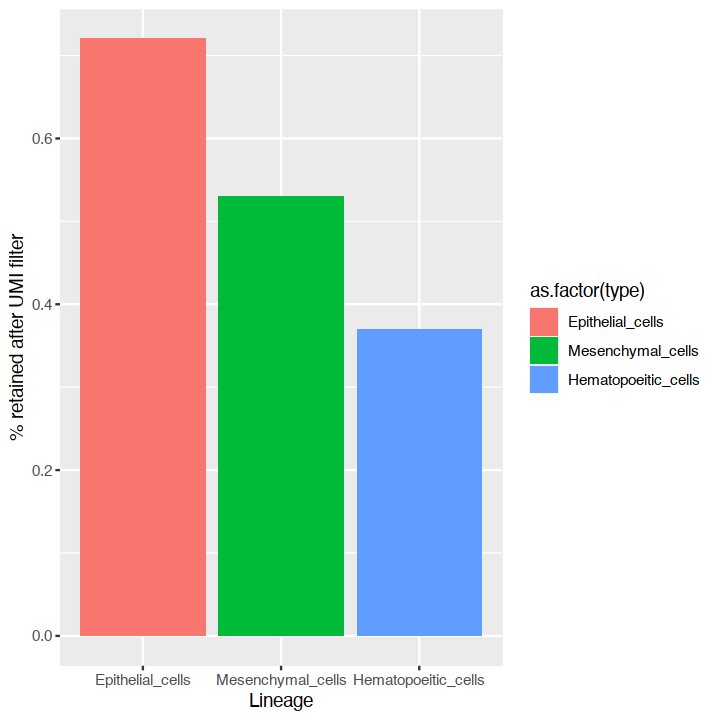

In [27]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(retained_sorted, aes(as.factor(type), round(as.numeric(pct_retained_reads_filter), 2), fill = as.factor(type) )) + 
geom_bar(stat = "identity") + 
xlab ('Lineage') + 
ylab ('% retained after UMI filter')
